In [30]:
import matplotlib.pyplot as plt

import pandas as pd
import os

from category_encoders.ordinal import OrdinalEncoder

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [31]:
works = pd.read_csv('./data/works.csv')
works

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN
...,...,...,...,...,...,...,...,...,...
82571,734c1116-0caf-4f8b-80d0-5e423cd1bcc6,9678,53976,47.0,"Handel, George Frideric",MESSIAH,Chorus: Worthy is the Lamb that was slain,"McGegan, Nicholas",NaN
82572,884c64d6-1768-4cf1-85f1-0ac2f79bbe5c,10608,53976,47.0,"Handel, George Frideric",MESSIAH,Chorus: Worthy is the Lamb that was slain,"Labadie, Bernard",NaN
82573,f549e93f-b35f-4824-b0d5-d543953535f8,9542,53976,51.0,"Handel, George Frideric",MESSIAH,Chorus: Amen,"Bicket, Harry",NaN
82574,734c1116-0caf-4f8b-80d0-5e423cd1bcc6,9678,53976,51.0,"Handel, George Frideric",MESSIAH,Chorus: Amen,"McGegan, Nicholas",NaN


In [11]:
works = works.copy()
works['con1'],works['con2'] = works.ConductorName.str.split(',',1).str

/home/sonia/.virtualenvs/blu02/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [8]:
works.head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,con1,con2
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN,Hill,Ureli Corelli
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN,Hill,Ureli Corelli
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN,Hill,Ureli Corelli
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN,Boucher,Alfred
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN,Hill,Ureli Corelli


In [12]:
works.filter(items = ['ProgramID','WorkID','con1','con2'])

,ProgramID,WorkID,con1,con2
0,3853,52446,Hill,Ureli Corelli
1,5178,52437,Hill,Ureli Corelli
2,10785,52364,Hill,Ureli Corelli
3,5887,52434,Boucher,Alfred
4,305,52453,Hill,Ureli Corelli
...,...,...,...,...
82571,9678,53976,McGegan,Nicholas
82572,10608,53976,Labadie,Bernard
82573,9542,53976,Bicket,Harry
82574,9678,53976,McGegan,Nicholas


In [13]:
! explorer.exe .

In [15]:
works.describe(include ='category')

ValueError: No objects to concatenate

In [16]:
works.head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,con1,con2
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN,Hill,Ureli Corelli
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN,Hill,Ureli Corelli
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN,Hill,Ureli Corelli
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN,Boucher,Alfred
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN,Hill,Ureli Corelli


In [17]:
works_cat = works.copy()

In [18]:
works_cat = works_cat.assign(GUID = works['GUID'].astype('category'))


In [19]:
works_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82576 entries, 0 to 82575
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   GUID           82576 non-null  category
 1   ProgramID      82576 non-null  int64   
 2   WorkID         82576 non-null  int64   
 3   MovementID     25372 non-null  float64 
 4   ComposerName   71296 non-null  object  
 5   WorkTitle      71289 non-null  object  
 6   Movement       24380 non-null  object  
 7   ConductorName  66195 non-null  object  
 8   Interval       11280 non-null  object  
 9   con1           66195 non-null  object  
 10  con2           66093 non-null  object  
dtypes: category(1), float64(1), int64(2), object(7)
memory usage: 7.2+ MB


In [20]:
works_cat.describe(include = 'category')

,GUID
count,82576
unique,13907
top,734c1116-0caf-4f8b-80d0-5e423cd1bcc6
freq,50


In [22]:
works_cat['GUID'].cat.ordered

False

In [27]:
X = works_cat[['GUID']]

In [28]:
X

,GUID
0,38e072a7-8fc9-4f9a-8eac-3957905c0002
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34
2,894e1a52-1ae5-4fa7-aec0-b99997555a37
3,34ec2c2b-3297-4716-9831-b538310462b7
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9
...,...
82571,734c1116-0caf-4f8b-80d0-5e423cd1bcc6
82572,884c64d6-1768-4cf1-85f1-0ac2f79bbe5c
82573,f549e93f-b35f-4824-b0d5-d543953535f8
82574,734c1116-0caf-4f8b-80d0-5e423cd1bcc6


<AxesSubplot:ylabel='Frequency'>

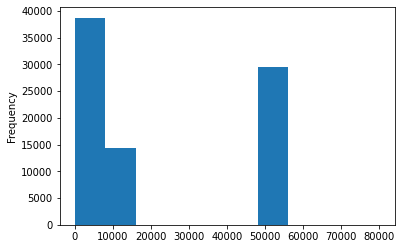

In [29]:
works['WorkID'].plot.hist(bins = 10)

In [32]:
works.head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN


In [35]:
works[works.ProgramID==10785].index[0]

2

In [ ]:
works.pipe()